<img src="../../supervised_learning/holberton_logo.png" alt="logo" width="500"/>

# Clustering

## 0. Initialize K-means

Write a function `def initialize(X, k)`: that initializes cluster centroids for `K-means`:

- `X` is a `numpy.ndarray` of shape `(n, d)` containing the dataset that will be used for `K-means` clustering
    - `n` is the number of data points
    - `d` is the number of dimensions for each data point


- `k` is a positive integer containing the number of clusters


- The cluster centroids should be initialized with a multivariate uniform distribution along each dimension in `d`:
    - The minimum values for the distribution should be the minimum values of `X` along each dimension in `d`
    - The maximum values for the distribution should be the maximum values of `X` along each dimension in `d`
    - You should use `numpy.random.uniform` exactly once
    
    
- You are not allowed to use any loops


- Returns: a `numpy.ndarray of shape (k, d)` containing the initialized centroids for each cluster, or `None` on failure


In [3]:
#!/usr/bin/env python3
"""Initialize function"""

import numpy as np


def initialize(X, k):
    """
    Initializes cluster centroids for K-means
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None
    if not isinstance(k, int) or k <= 0:
        return None

    # Setting min and max values per col
    n, d = X.shape
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)

    # return multivariate uniform distribution
    return np.random.uniform(X_min, X_max, size=(k, d))


## Main (Test) File

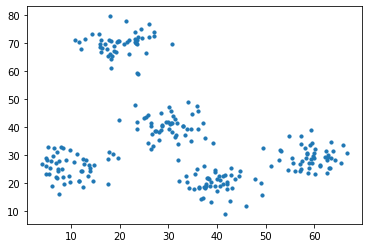

[[14.54730144 13.46780434]
 [20.57098466 33.55245039]
 [ 9.55556506 51.51143281]
 [48.72458008 20.03154959]
 [25.43826106 60.35542243]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.show()
    print(initialize(X, 5))

## 1. K-means

K-Means aims to **minimize the sum of squared distances between data points and their assigned cluster centroids, effectively partitioning the data into K clusters based on similarity**. It is an iterative and unsupervised algorithm commonly used for clustering analysis. The key steps of the K-Means clustering algorithm are as follows:


1. **Initialization**: Randomly select `K` initial cluster centroids (representative points) from the dataset.


2. **Assignment**: Assign each data point to the nearest cluster centroid based on a distance metric, often Euclidean distance.


3. **Update Centroids**: Recalculate the cluster centroids as the mean of all data points assigned to each cluster.


4. **Repeat**: Iterate steps 2 and 3 until convergence criteria are met, such as a maximum number of iterations or minimal centroid movement.


5. **Convergence**: The algorithm converges when the cluster centroids no longer change significantly between iterations or when a predefined stopping criterion is satisfied.

### Our Task

The final cluster assignments and centroids represent the clustering solution.









Write a function `def kmeans(X, k, iterations=1000)`: that performs `K-means` on a dataset:

- `X` is a numpy.ndarray of shape `(n, d)` containing the dataset
    - `n` is the number of data points
    - `d` is the number of dimensions for each data point


- `k` is a positive integer containing the number of clusters


- `iterations` is a positive integer containing the maximum number of iterations that should be performed


- If no change in the cluster centroids occurs between iterations, your function should return


- Initialize the cluster centroids using a multivariate uniform distribution (based on `0-initialize.py`)


- If a cluster contains no data points during the update step, reinitialize its centroid


- You should use `numpy.random.uniform` exactly twice


- You may use at most 2 loops


- Returns: `C`, `clss`, or `None`, `None` on failure
    - `C` is a `numpy.ndarray` of shape `(k, d)` containing the centroid means for each cluster
    - `clss` is a `numpy.ndarray` of shape `(n,)` containing the index of the cluster in `C` that each data point belongs to

In [5]:
#!/usr/bin/env python3
"""K means"""

import numpy as np


def kmeans(X, k, iterations=1000):
    """
    K-means on a data set
    """
    
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None
    if not isinstance(k, int) or k <= 0:
        return None, None
    if not isinstance(iterations, int) or iterations <= 0:
        return None, None

    # Setting min and max values per col
    n, d = X.shape
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)

    # Centroid
    C = np.random.uniform(X_min, X_max, size=(k, d))

    # Loop for the maximum number of iterations
    for i in range(iterations):

        # initializes k centroids by selecting them from the data points
        centroids = np.copy(C)
        centroids_extended = C[:, np.newaxis] # shape of C from (k, d) to (k, 1, d)

        # euclidean distance (dimensions of the squared distances)
        distances = np.sqrt(((X - centroids_extended) ** 2).sum(axis=2))
        # an array containing the index to the nearest centroid for each point
        clss = np.argmin(distances, axis=0)

        # Assign all points to the nearest centroid
        for c in range(k):
            if X[clss == c].size == 0: # cluster is empty
                C[c] = np.random.uniform(X_min, X_max, size=(1, d))
            else:
                C[c] = X[clss == c].mean(axis=0)

        # repeat again
        centroids_extended = C[:, np.newaxis]
        distances = np.sqrt(((X - centroids_extended) ** 2).sum(axis=2))
        clss = np.argmin(distances, axis=0)

        # if there are ano changes
        if (centroids == C).all():
            break

    return C, clss

### Main (Test) File

[[ 9.92511389 25.73098987]
 [30.06722465 40.41123947]
 [39.62770705 19.89843487]
 [59.22766628 29.19796006]
 [20.0835633  69.81592298]]


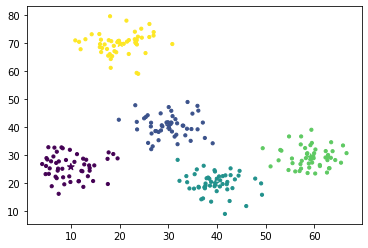

In [6]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    C, clss = kmeans(X, 5)
    print(C)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()

## Variance

In the context of K-Means clustering, **variance represents the measure of how much the data points within each cluster differ from their respective cluster centroid**. 


More specifically, it quantifies the spread or dispersion of data points around their cluster's center. The intra-cluster variance aims to be minimized during the K-Means algorithm's execution, as it **indicates how well the data points are grouped together within clusters**. 


Lower intra-cluster variance implies that data points are closer to their centroids, leading to better-defined and more cohesive clusters


### Our Task

Write a function `def variance(X, C)`: that calculates the total intra-cluster variance for a data set:
    - `X` is a `numpy.ndarray` of shape `(n, d)` containing the data set
    - `C` is a numpy.ndarray of shape `(k, d)` containing the centroid means for each cluster


- You are not allowed to use any loops


- Returns: `var`, or `None` on failure
    - `var` is the total variance

In [7]:
#!/usr/bin/env python3
"""Variance"""

import numpy as np


def variance(X, C):
    """
    Calculate the total intra-cluste variance for a data set
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None
    if not isinstance(C, np.ndarray) or len(C.shape) != 2:
        return None
    if X.shape[1] != C.shape[1]:
        return None

    n, d = X.shape

    """
    In K-means clustering, the primary objective is to 
    minimize the intra-cluster variance, 
    which represents how much the data points 
    within each cluster differ from their cluster centroid. 
    """
    # distances also know as euclidean distance
    centroids_extended = C[:, np.newaxis]
    distances = np.sqrt(((X - centroids_extended) ** 2).sum(axis=2))
    min_distances = np.min(distances, axis=0)

    variance = np.sum(min_distances ** 2)

    return variance

### Test (Main) File

In [8]:
#!/usr/bin/env python3

import numpy as np

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    for k in range(1, 11):
        C, _ = kmeans(X, k)
        print('Variance with {} clusters: {}'.format(k, variance(X, C).round(5)))

Variance with 1 clusters: 157927.7052
Variance with 2 clusters: 82095.68297
Variance with 3 clusters: 34784.23723
Variance with 4 clusters: 23158.40095
Variance with 5 clusters: 7868.52123
Variance with 6 clusters: 7406.93077
Variance with 7 clusters: 6930.66361
Variance with 8 clusters: 6162.15884
Variance with 9 clusters: 5843.92455
Variance with 10 clusters: 5727.41124


## 3. Optimize K

Optimizing the number of clusters means **finding the right number of groups in our data when using a method like K-Means**. 


**Variance** is a way to **measure how spread out the data points are within each group**. Lower variance suggests that the data points in a group are closer together. So, we aim to choose the number of clusters that minimizes this variance, as it indicates that the groups are distinct and well-separated. 


We want to strike a balance between having clearly separated groups (low variance) and not having too many groups to keep things manageable.


### Our Task

Write a function `def optimum_k(X, kmin=1, kmax=None, iterations=1000)`: that tests for the optimum number of clusters by variance:

- `X` is a `numpy.ndarray` of shape `(n, d)` containing the data set


- `kmin` is a positive integer containing the minimum number of clusters to check for (inclusive)


- `kmax` is a positive integer containing the maximum number of clusters to check for (inclusive)


- `iterations` is a positive integer containing the maximum number of iterations for `K-means`



- Returns: `results`, `d_vars`, or `None, None` on failure
    - `results` is a list containing the outputs of K-means for each cluster size
    - `d_vars` is a list containing the difference in variance from the smallest cluster size for each cluster size
    
### Key Concepts

#### 1. **K-Means Clustering**
K-means is a clustering algorithm that partitions data into `k` clusters. The algorithm iteratively assigns each data point to the nearest cluster center (centroid), recalculates centroids, and repeats this process until convergence. 

**One of the key challenges in K-means is determining the optimal number of clusters (`k`)**, as an incorrect choice can lead to poor clustering.

#### 2. **Variance in K-Means**
**Variance in clustering is a measure of how well data points fit within their assigned clusters**. Lower variance implies that the data points are closer to their cluster centroids, indicating a better fit. 


#### 3. **Choosing the Optimal Number of Clusters (Elbow Method)**

A common method to choose the optimal number of clusters is the **Elbow Method**, which looks at the variance (or within-cluster sum of squares). **As `k` increases, the variance decreases, but after a certain point, the rate of decrease slows down, forming an "elbow" on the plot**. The elbow point is often a good choice for the number of clusters.

In the code:
- The function loops through possible values of `k` from `kmin` to `kmax`.
- For each value of `k`, K-means is applied to the dataset, and variance is computed for each clustering result.
- The **difference in variance** is calculated between the smallest cluster size (`kmin`) and each subsequent cluster size, which helps detect the elbow point.

#### 4. **Iteration Control and Efficiency**
K-means can sometimes take a large number of iterations to converge, so controlling the maximum number of iterations helps in managing computation time. The parameter `iterations` allows users to limit the number of iterations for K-means clustering.

The code checks the following conditions:
- Whether `X` is a valid 2D numpy array (dataset).
- `kmin`, `kmax`, and `iterations` are valid positive integers.
- The range between `kmin` and `kmax` is valid to ensure that multiple cluster sizes are tested.

#### 5. **Major Steps in the Code**
- **Input validation**: The function checks if the inputs are valid. This includes checking the dimensions of the dataset `X`, ensuring `kmin`, `kmax`, and `iterations` are integers, and ensuring `kmin` is less than `kmax`.
- **Loop over k values**: For each value of `k` in the range `[kmin, kmax]`, the K-means algorithm is run, and the variance is computed for the resulting clusters.
- **Variance difference**: The variance for each clustering solution is compared to the variance when `k = kmin`. The difference in variance helps identify the optimal number of clusters, as variance decreases more slowly after the optimal `k`.
- **Results and Return**: The function returns two lists: 
  - `results`: Contains the centroids and cluster labels for each `k`.
  - `d_vars`: Contains the differences in variance for each `k` compared to the smallest cluster size.

In [9]:
#!/usr/bin/env python3
"""Optimum K method aka inversed elbow"""

import numpy as np


def optimum_k(X, kmin=1, kmax=None, iterations=1000):
    """
    Optimun K method with variance
    """
    try:
        if not isinstance(X, np.ndarray) or len(X.shape) != 2:
            return None, None
        if not isinstance(iterations, int) or iterations < 1:
            return None, None
        if kmax is not None and (type(kmax) is not int or kmax < 1):
            return None, None
        if kmax is not None and kmin >= kmax:
            return None, None
        if kmax is None:
            kmax = X.shape[0]
        if not isinstance(kmin, int) or kmin < 1 or kmin >= X.shape[0]:
            return None, None

        results = []
        d_vars = []
        for k in range(kmin, kmax + 1):
            cluster, clss = kmeans(X, k, iterations)
            results.append((cluster, clss))
            variance_d = variance(X, cluster)
            if k == kmin:
                variance_k = variance_d
            d_vars.append(variance_k - variance_d)
        return results, d_vars
    except Exception:
        return None, None

### Main (Test) File

[(array([[31.78625503, 37.01090945]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)), (array([[34.76990289, 28.71421162],
       [20.14417812, 69.38429903]]), array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0

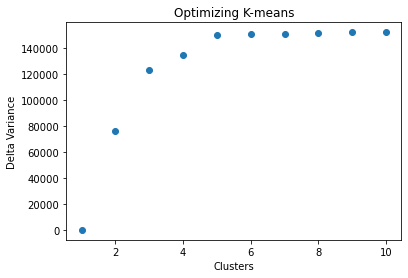

In [10]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    results, d_vars = optimum_k(X, kmax=10)
    print(results)
    print(np.round(d_vars, 5))
    plt.scatter(list(range(1, 11)), d_vars)
    plt.xlabel('Clusters')
    plt.ylabel('Delta Variance')
    plt.title('Optimizing K-means')
    plt.show()

## 4. Initialize GMM

Gaussian Mixture Model (GMM) is a **statistical model that represents data as a combination of multiple Gaussian distributions**, each with its own mean and variance. In the context of K-Means, GMM serves as a more **flexible alternative**. While K-Means assumes that clusters are spherical and equally sized, GMM allows clusters to have different shapes, sizes, and orientations.


In K-Means, data points are assigned to the nearest cluster center (centroid), leading to hard assignments. GMM, on the other hand, **provides soft assignments, meaning it calculates the probability of each data point belonging to each cluster**. This flexibility can better capture complex data distributions.

### Our Task

Write a function `def initialize(X, k)`: that initializes variables for a Gaussian Mixture Model:

- `X` is a `numpy.ndarray` of shape `(n, d)` containing the data set


- `k` is a positive integer containing the number of clusters


- Returns: `pi`, `m`, `S`, or `None`, `None`, `None` on failure
    - `pi` is a `numpy.ndarray` of shape `(k,)` containing the priors for each cluster, initialized evenly
    - `m` is a `numpy.ndarray` of shape `(k, d)` containing the centroid means for each cluster, initialized with K-means
    - `S` is a numpy.ndarray of shape `(k, d, d)` containing the covariance matrices for each cluster, initialized as identity matrices
    
### Intuition Behind Gaussian Mixture Model (GMM)

A **Gaussian Mixture Model (GMM)** is a probabilistic model used to represent a distribution of data points as a combination of several Gaussian distributions (also known as normal distributions). 

Unlike **K-means**, which assigns each data point to a single cluster (hard clustering), GMM applies a **soft clustering** approach, where each data point has a probability of belonging to multiple clusters. This allows GMM to model more complex cluster shapes, especially those with varying sizes and covariance structures.

#### Key Ideas:
1. **Gaussian Distributions:** GMM assumes that the data points in each cluster follow a Gaussian distribution, parameterized by a mean (centroid), covariance matrix (shape of the distribution), and a weight (prior probability of the cluster).
2. **Soft Clustering:** Each data point is assigned a probability of belonging to each cluster rather than being strictly assigned to one. The assignment is done based on the Gaussian probability density function.
3. **K-means and GMM Connection:**
   - Both algorithms seek to partition the dataset into clusters.
   - **K-means** assigns each data point to the nearest centroid based on Euclidean distance, while **GMM** assigns probabilities to each data point for each cluster.
   - GMM can be viewed as a generalization of K-means, where instead of assigning points based on distance, it assigns them based on a Gaussian likelihood.

### Key Concepts in the Code:
- **Priors (phi):** This represents the probability that any randomly selected point belongs to a particular cluster. Since we start with an assumption that all clusters are equally probable, the priors are initialized evenly.
- **Means (m):** These are the centroids of the clusters, which are initialized using the results of K-means. The centroids help define the Gaussian distributions.
- **Covariance Matrices (S):** These matrices represent the shape of the distribution for each cluster, initialized as identity matrices, meaning that initially, we assume spherical distributions for each cluster.


### Key Steps in the Code:
1. **Input Validation:**
   - The function first checks whether the input dataset `X` is a 2D NumPy array (for rows and columns) and whether `k` is a valid positive integer.
  
2. **Initializing Priors (`phi`):**
   - The prior probabilities for each cluster are initialized evenly, meaning each cluster is equally likely at the start (`phi = 1/k`).

3. **Initializing Centroids (`m`) with K-means:**
   - To get an initial guess of the centroids for each cluster, K-means is used to partition the data and find the initial means of the clusters. This is where K-means helps as a starting point for GMM.

4. **Initializing Covariance Matrices (`S`):**
   - The covariance matrices are initialized as identity matrices for each cluster. This assumes that each cluster is initially spherical with no correlation between features.


In [11]:
#!/usr/bin/env python3
"""GMM function """

import numpy as np


def initialize(X, k):
    """
    initializes variables for a Gaussian Mixture Model
    """

    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None, None
    if not isinstance(k, int) or k < 1:
        return None, None, None

    n, d = X.shape

    # priors for each cluster, initialized evenly
    phi = np.ones(k)/k

    # centroid means for each cluster, initialized with K-means
    m, _ = kmeans(X, k)

    # covariance matrices for each cluster, initialized as identity matrices
    S = np.tile(np.identity(d), (k, 1)).reshape(k, d, d)

    return phi, m, S

### Main (Test) File

In [12]:
#!/usr/bin/env python3

import numpy as np

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    print(pi)
    print(m)
    print(S)

[0.25 0.25 0.25 0.25]
[[54.73711515 31.81393242]
 [16.84012557 31.20248225]
 [21.43215816 65.50449077]
 [32.3301925  41.80664127]]
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]


## PDF

Write a function `def pdf(X, m, S)`: that calculates the probability density function of a Gaussian distribution:

- `X` is a `numpy.ndarray` of shape `(n, d)` containing the data points whose PDF should be evaluated


- `m` is a `numpy.ndarray` of shape `(d,)` containing the mean of the distribution


- `S` is a `numpy.ndarray` of shape `(d, d)` containing the covariance of the distribution


- Returns: `P`, or `None` on failure


- `P` is a `numpy.ndarray` of shape `(n,)` containing the PDF values for each data point


- All values in `P` should have a minimum value of `1e-300`


### Gaussian Probability Density Function (PDF)

In a multivariate Gaussian (Normal) distribution, the probability density function (PDF) for a data point \( x \) can be computed using the following formula:

$$
p(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \cdot \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
$$

Where:
- $x$ is a data point (vector of dimension $d$)
- $\mu$ is the mean vector of the distribution (also of dimension $ d $)
- $ \Sigma $ is the covariance matrix (a $ d \times d $ matrix)
- $ |\Sigma| $ is the determinant of the covariance matrix
- $ \Sigma^{-1} $ is the inverse of the covariance matrix
- $ d $ is the dimensionality of the data

#### Steps to Compute the PDF:

1. **Centering the Data**:
   - Compute the difference between each data point $ X $ and the mean $ \mu $:
   $$
   X - \mu
   $$
   This results in a matrix where each row represents the centered data for each point.

2. **Covariance Matrix**:
   - Compute the determinant $ |\Sigma| $ of the covariance matrix $ \Sigma $. The determinant is used to scale the distribution, influencing the spread of the data.
   $$
   \text{det}(\Sigma)
   $$
   - Compute the inverse of the covariance matrix:
   $$
   \Sigma^{-1}
   $$

3. **Exponent Term**:
   - The exponent is based on the Mahalanobis distance, which measures the distance between a point and the mean, normalized by the covariance. The exponent term is:
   $$
   \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
   $$
   This captures how far the data point $ x $ is from the mean $ \mu $, scaled by the shape of the distribution described by $ \Sigma $.

4. **Scaling Factor**:
   - The entire PDF is scaled by a factor related to the dimensionality \( d \) of the data and the determinant \( |\Sigma| \). The scaling factor is:
   $$
   \frac{1}{\sqrt{(2\pi)^d |\Sigma|}}
   $$
   This ensures that the total probability across all possible data points integrates to 1.

5. **Final PDF Calculation**:
   - Multiply the exponent by the scaling factor to get the final PDF value for each data point. The formula for the PDF is:
   $$
   p(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \cdot \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)
   $$

#### Handling Small Values:

In numerical computations, very small values of the PDF can cause issues. To avoid this, we set a minimum threshold:
$$
P = \max(p(x | \mu, \Sigma), 1e-300)
$$
This ensures that no PDF value is lower than \( 1e-300 \), preventing underflow errors.

---

### Key Concepts:

- **Covariance Matrix**: Represents the shape and orientation of the data spread. A larger determinant means more spread, while the inverse adjusts for the orientation.
- **Mahalanobis Distance**: Measures how many standard deviations away a point is from the mean, adjusted for the covariance.
- **Scaling Factor**: Adjusts the PDF values to ensure the total probability is valid for the Gaussian distribution.


In [13]:
#!/usr/bin/env python3
"""PDF function """

import numpy as np


def pdf(X, m, S):
    """
    Probability Density Function of gaussian distributions
    """
    
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None
    if not isinstance(m, np.ndarray) or len(m.shape) != 1:
        return None
    if not isinstance(S, np.ndarray) or len(S.shape) != 2:
        return None
    if X.shape[1] != m.shape[0] or X.shape[1] != S.shape[0]:
        return None
    if S.shape[0] != S.shape[1]:
        return None

    # formula
    # p(x∣ μ,Σ) = (1 √(2π)d|Σ|)exp(−1/2(x−μ)T Σ−1(x−μ))
    n, d = X.shape
    mean = m
    x_m = X - mean

    # Determinant of the covariance matrix (d x d)
    det_S = np.linalg.det(S)

    # Since Σ is Hermitian, it has an eigendecomposition
    inv_S = np.linalg.inv(S)

    # Formula Section one: (1 √(2π)d|Σ|)
    part_1_dem = np.sqrt(det_S) * ((2 * np.pi) ** (d/2))

    # Formula Section two_upper_1: −1/2(x−μ)T
    part_2 = np.matmul(x_m, inv_S)

    # Formula Section two_upper_2: Σ−1(x−μ) used diagonal to fix alloc err
    part_2_1 = np.sum(x_m * part_2, axis=1)

    # Formula Section two exp(−1/2(x−μ)T Σ−1(x−μ))
    part_2_2 = np.exp(part_2_1 / -2)

    # pdf = part_1 * part_2_2:
    pdf = part_2_2 / part_1_dem
    P = np.where(pdf < 1e-300, 1e-300, pdf)
    return P

In [14]:
#!/usr/bin/env python3

import numpy as np

if __name__ == '__main__':
    np.random.seed(0)
    m = np.array([12, 30, 10])
    S = np.array([[36, -30, 15], [-30, 100, -20], [15, -20, 25]])
    X = np.random.multivariate_normal(m, S, 10000)
    P = pdf(X, m, S)
    print(P)

[3.47450910e-05 2.53649178e-06 1.80348301e-04 ... 1.24604061e-04
 1.86345129e-04 2.59397003e-05]


## 6. Expectation

Write a function `def expectation(X, pi, m, S)`: that calculates the expectation step in the EM algorithm for a GMM:

- `X` is a numpy.ndarray of shape `(n, d)` containing the data set


- `pi` is a `numpy.ndarray` of shape `(k,)` containing the priors for each cluster


- `m` is a `numpy.ndarray` of shape `(k, d)` containing the centroid means for each cluster


- `S` is a `numpy.ndarray` of shape `(k, d, d)` containing the covariance matrices for each cluster


- Returns: `g`, `l`, or `None, None` on failure
    - `g` is a `numpy.ndarray` of shape `(k, n)` containing the posterior probabilities for each data point in each cluster
    - `l` is the total log likelihood
    
### Expectation Step in the EM Algorithm for GMM

The Expectation-Maximization (EM) algorithm is commonly used in Gaussian Mixture Models (GMM) to find the parameters (means, covariances, and priors) that best fit the data. The **Expectation step (E-step)** calculates the posterior probabilities (or responsibilities) for each data point to belong to each Gaussian cluster. This step is crucial for assigning probabilities in a soft clustering model like GMM.

#### Formula for Posterior Probabilities (Responsibilities)

The posterior probability $ g_{ij} $, which represents the probability of data point $ X_i $ belonging to cluster $ j $, is calculated as:

$$
g_{ij} = \frac{\pi_j \cdot p(X_i \mid \mu_j, \Sigma_j)}{\sum_{z=1}^{k} \pi_z \cdot p(X_i \mid \mu_z, \Sigma_z)}
$$

Where:
- $ \pi_j $ is the prior probability (weight) of cluster $ j $
- $ p(X_i \mid \mu_j, \Sigma_j) $ is the probability density function (PDF) of the Gaussian distribution for cluster $ j $ evaluated at data point $ X_i $ (computed using the PDF function developed earlier)
- $ k $ is the number of clusters
- $ \mu_j $ is the mean vector of cluster $ j $
- $ \Sigma_j $ is the covariance matrix of cluster $ j $

The **posterior probability** $ g_{ij} $ indicates how likely it is that data point $ X_i $ belongs to cluster $ j $.

#### Total Log Likelihood

The total log likelihood is used to measure how well the model explains the observed data and is calculated as:

$$
\mathcal{L} = \sum_{i=1}^{n} \log \left( \sum_{j=1}^{k} \pi_j \cdot p(X_i \mid \mu_j, \Sigma_j) \right)
$$

Where $ n $ is the number of data points, and $ k $ is the number of clusters.

This log likelihood helps assess the fit of the model by measuring the likelihood of the observed data given the current parameters.

---

### Steps in the Expectation Step (E-step):

1. **Input Validation**:
   - Ensure that $ X $, $ \pi $, $ m $, and $ S $ have the correct shapes and are valid `numpy` arrays.
   - $ X $ should be an array of shape $ (n, d) $ (data points).
   - $ \pi $ should be of shape $ (k,) $ (priors for each cluster).
   - $ m $ should be of shape $ (k, d) $ (mean vectors for each cluster).
   - $ S $ should be of shape $ (k, d, d) $ (covariance matrices for each cluster).

2. **Calculate the Likelihood for Each Data Point**:
   - For each cluster $ j $, calculate the likelihood of each data point $ X_i $ using the Gaussian PDF:
   $$
   p(X_i \mid \mu_j, \Sigma_j)
   $$

3. **Compute Posterior Probabilities**:
   - The posterior probability $ g_{ij} $ is calculated using the formula:
   $$
   g_{ij} = \frac{\pi_j \cdot p(X_i \mid \mu_j, \Sigma_j)}{\sum_{z=1}^{k} \pi_z \cdot p(X_i \mid \mu_z, \Sigma_z)}
   $$
   This step assigns soft cluster memberships to each data point.

4. **Calculate the Total Log Likelihood**:
   - The log likelihood is the sum of the logarithms of the marginal likelihoods across all data points:
   $$
   \mathcal{L} = \sum_{i=1}^{n} \log \left( \sum_{j=1}^{k} \pi_j \cdot p(X_i \mid \mu_j, \Sigma_j) \right)
   $$

5. **Return Posterior Probabilities and Log Likelihood**:
   - The function returns the posterior probabilities matrix $ g $ and the total log likelihood $ \mathcal{L} $.

---

### Key Concepts:

- **Posterior Probability (Responsibility)**: Measures how likely each data point is to belong to each cluster.
- **Log Likelihood**: Evaluates how well the current parameters of the GMM explain the observed data.


In [16]:
#!/usr/bin/env python3
""" E-step: expected value of likelihood function
    respect the conditional distribution
"""

import numpy as np

def expectation(X, pi, m, S):
    """
    Function that calculates the expectation step in the EM algorithm for a GMM
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None
    if not isinstance(m, np.ndarray) or len(m.shape) != 2:
        return None, None
    if not isinstance(pi, np.ndarray) or len(pi.shape) != 1:
        return None, None
    if not isinstance(S, np.ndarray) or len(S.shape) != 3:
        return None, None
    if not np.isclose([np.sum(pi)], [1])[0]:
        return None, None

    n, d = X.shape
    k = pi.shape[0]
    if d != m.shape[1] or d != S.shape[1] or d != S.shape[2]:
        return None, None
    if k != m.shape[0] or k != S.shape[0]:
        return None, None

    centroids_mean = m
    covariance_mat = S
    gauss_components = np.zeros((k, n))

    # http://ethen8181.github.io/machine-learning/clustering/GMM/GMM.html
    # P(j) P(Xn | j) / ∑k j=1 P(j) P(Xn | j)
    for i in range(k):
        likelihood = pdf(X, centroids_mean[i], covariance_mat[i])
        prior = pi[i]
        gauss_components[i] = likelihood * prior
    g = gauss_components / np.sum(gauss_components, axis=0)

    # https://zhiyzuo.github.io/EM/
    # Log likelihood: ∑i ln ∑z^i p((x^i) , (z^i);Θ)
    log_likelihood = np.sum(np.log(np.sum(gauss_components, axis=0)))

    return g, log_likelihood

### Main (Test) File

In [18]:
#!/usr/bin/env python3

import numpy as np

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    g, l = expectation(X, pi, m, S)
    print(g)
    print(np.sum(g, axis=0))
    print(l)

[[1.98542668e-055 1.00000000e+000 1.56526421e-185 ... 1.00000000e+000
  3.70567311e-236 1.91892348e-012]
 [6.97883333e-085 2.28658376e-279 9.28518983e-065 ... 8.12227631e-287
  1.53690661e-032 3.17417182e-181]
 [9.79811365e-234 2.28658376e-279 2.35073465e-095 ... 1.65904890e-298
  9.62514613e-068 5.67072057e-183]
 [1.00000000e+000 7.21133039e-186 1.00000000e+000 ... 2.42138447e-125
  1.00000000e+000 1.00000000e+000]]
[1. 1. 1. ... 1. 1. 1.]
-652797.7866541843


## 7. Maximization

Write a function `def maximization(X, g)`: that calculates the maximization step in the EM algorithm for a GMM:

- `X` is a `numpy.ndarray` of shape `(n, d)` containing the data set


- `g` is a `numpy.ndarray` of shape `(k, n)` containing the posterior probabilities for each data point in each cluster


- Returns: `pi`, `m`, `S`, or `None, None, None` on failure
    - `pi` is a `numpy.ndarray` of shape `(k,)` containing the updated priors for each cluster
    - `m` is a `numpy.ndarray` of shape `(k, d)` containing the updated centroid means for each cluster
    - `S` is a `numpy.ndarray` of shape `(k, d, d)` containing the updated covariance matrices for each cluster
    
### Maximization Step in the EM Algorithm for GMM

The Maximization step (M-step) in the Expectation-Maximization (EM) algorithm updates the parameters (priors, means, and covariances) of the Gaussian Mixture Model (GMM) based on the posterior probabilities (responsibilities) calculated in the Expectation step (E-step). The goal is to maximize the likelihood of the observed data under the current posterior probabilities.


### Step-by-Step Explanation:

```python
if not isinstance(X, np.ndarray) or len(X.shape) != 2:
    return None, None, None
```
- This checks if `X` is a 2D numpy array. If not, it returns `None` for all outputs, indicating a failure.

```python
n, d = X.shape
```
- Extracts `n` (number of data points) and `d` (dimensionality of each data point) from `X`.

```python
if not isinstance(g, np.ndarray) or len(g.shape) != 2:
    return None, None, None
```
- This checks if `g` is also a 2D numpy array. If it’s not, the function returns `None` for all outputs.

```python
k, n1 = g.shape
```
- Extracts `k` (number of clusters) and `n1` (number of data points) from `g`. 

```python
if n != n1 or np.abs(np.sum(g, axis=0) - 1).max() > 1e-10:
    return None, None, None
```
- This ensures that the number of data points in `g` matches that of `X` (`n == n1`).
- It also checks if the sum of the posterior probabilities $g[i, j]$ for each data point $j$ across all clusters is close to 1 (within a tolerance of $1 \times 10^{-10}$). If not, the function returns `None`, indicating an issue with the input data.

```python
S = np.zeros((k, d, d))
```
- Initializes an array `S` to store the updated covariance matrices for each cluster. It has a shape of $(k, d, d)$ — one covariance matrix for each cluster, where each matrix is \(d \times d\).

```python
sum_g = np.sum(g, axis=1)
```
- Computes the sum of the posterior probabilities for each cluster. This gives a vector of shape $(k,)$, where each entry represents the total responsibility for each cluster.

```python
pi = sum_g / n
```
- Updates the **priors** ($\pi$) for each cluster. The prior for cluster $i$ is the fraction of data points assigned to that cluster, calculated by dividing the sum of responsibilities for that cluster by the total number of data points $n$.

```python
m = np.dot(g, X) / sum_g[:, np.newaxis]
```
- Updates the **means** ($m$) for each cluster. This is done by calculating a weighted average of the data points $X$, where the weights are the posterior probabilities from $g$.
- `np.dot(g, X)` computes the weighted sum of the data points for each cluster.
- Dividing by `sum_g[:, np.newaxis]` normalizes the weighted sum by the total responsibility for each cluster, giving the new centroid (mean) for each cluster.

```python
for i in range(k):
    diff = X - m[i]
    weighted_diff = (g[i, :, np.newaxis] * diff).T
    S[i] = np.dot(weighted_diff, diff) / sum_g[i]
```
- **Covariance Matrix Update**:
  - Loop over each cluster $i$ to update its covariance matrix.
  - `diff = X - m[i]` calculates the difference between the data points and the mean of cluster $i$, effectively centering the data around the updated mean for that cluster.
  - `g[i, :, np.newaxis] * diff` scales the differences by the posterior probabilities (responsibilities), so each data point’s contribution to the covariance matrix is weighted by its responsibility for cluster $i$.
  - `np.dot(weighted_diff, diff)` computes the outer product of the weighted differences and the differences. This is summed over all data points to get the covariance matrix.
  - Finally, divide by `sum_g[i]` to normalize by the total responsibility for the cluster, yielding the updated covariance matrix for cluster $i$.

### Return:
```python
return pi, m, S
```
- The function returns the updated priors (`pi`), means (`m`), and covariance matrices (`S`) for the GMM.

### Summary:
- **Priors** ($ \pi $): The fraction of data points that belong to each cluster.
- **Means** ($ m $): The new centroids of the clusters, computed as a weighted average of the data points.
- **Covariance Matrices** ($ S $): The new covariance matrices, computed as the weighted spread of the data points around the centroids.

This implementation is efficient, using only one loop (over the clusters) and vectorized operations to compute the means and covariance matrices.

In [19]:
#!/usr/bin/env python3
""" M-step: re-estimate all parameters so that
the likelihood of observing what we observed is maximized
"""

import numpy as np


def maximization(X, g):
    """
    calculates the maximization step in the EM algorithm for a GMM
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None, None
    if not isinstance(g, np.ndarray) or len(X.shape) != 2:
        return None, None, None

    gaussian_components = g

    k = gaussian_components.shape[0]
    n, d = X.shape

    posterior_prob = np.sum(gaussian_components, axis=0)
    check = np.sum(posterior_prob)
    if check != X.shape[0]:
        return None, None, None

    # pi
    priors = np.zeros((k,))

    # m
    centroid_updated = np.zeros((k, d))

    # S
    covariance_updated = np.zeros((k, d, d))

    # Formula https://bit.ly/31pkdox
    for i in range(k):

        # Mu components
        # Needed to adjust dimensions for fitting the covariance
        mu_up = np.sum((gaussian_components[i, :, np.newaxis] * X), axis=0)
        mu_down = np.sum(gaussian_components[i], axis=0)
        centroid_updated[i] = mu_up / mu_down

        # Sigma components
        x_m = X - centroid_updated[i]
        sigma_up = np.matmul(gaussian_components[i] * x_m.T, x_m)
        sigma_down = np.sum(gaussian_components[i])
        covariance_updated[i] = sigma_up / sigma_down

        # Pi =  priors after computing derivation of sigma and mu
        # Formula: P(j) = n(j) / n = Σn i=1 P(j|i) / n
        priors[i] = np.sum(gaussian_components[i]) / n
    return priors, centroid_updated, covariance_updated

In [20]:
#!/usr/bin/env python3

import numpy as np

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    pi, m, S = initialize(X, 4)
    g, _ = expectation(X, pi, m, S)
    pi, m, S = maximization(X, g)
    print(pi)
    print(m)
    print(S)

[0.10104901 0.24748822 0.1193333  0.53212947]
[[54.7440558  31.80888393]
 [16.84099873 31.20560148]
 [21.42588061 65.51441875]
 [32.33208369 41.80830251]]
[[[64.05063663 -2.13941814]
  [-2.13941814 41.90354928]]

 [[72.72404579  9.96322554]
  [ 9.96322554 53.05035303]]

 [[46.20933259  1.08979413]
  [ 1.08979413 66.9841323 ]]

 [[35.04054823 -0.94790014]
  [-0.94790014 45.14948772]]]


## 8. EM

Write a function `def expectation_maximization(X, k, iterations=1000, tol=1e-5, verbose=False)`: that performs the expectation maximization for a GMM:

- `X` is a `numpy.ndarray` of shape `(n, d)` containing the data set


- `k` is a positive integer containing the number of clusters


- `iterations` is a positive integer containing the maximum number of iterations for the algorithm


- `tol` is a non-negative float containing tolerance of the log likelihood, used to determine early stopping i.e. if the difference is less than or equal to tol you should stop the algorithm


- `verbose` is a boolean that determines if you should print information about the algorithm


- If `True`, print `Log Likelihood after {i} iterations: {l}` every 10 iterations and after the last iteration
    - `{i}` is the number of iterations of the EM algorithm
    - `{l}` is the log likelihood, rounded to 5 decimal places


- Returns: `pi, m, S, g, l`, or `None, None, None, None, None` on failure
    - `pi` is a `numpy.ndarray` of shape `(k,)` containing the priors for each cluster
    - `m` is a `numpy.ndarray` of shape `(k, d)` containing the centroid means for each cluster
    - `S` is a `numpy.ndarray` of shape `(k, d, d)` containing the covariance matrices for each cluster
    - `g` is a `numpy.ndarray` of shape `(k, n)` containing the probabilities for each data point in each cluster
    - `l` is the log likelihood of the model

In [21]:
#!/usr/bin/env python3
"""
Final step iterate E and M to get EM algorithm
"""

def expectation_maximization(X,
                             k,
                             iterations=1000,
                             tol=1e-5,
                             verbose=False):
    """
    EM in a GMM
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None, None, None, None
    if type(k) != int or k <= 0 or X.shape[0] < k:
        return None, None, None, None, None
    if type(iterations) != int or iterations <= 0:
        return None, None, None, None, None
    if type(tol) != float or tol < 0:
        return None, None, None, None, None
    if type(verbose) != bool:
        return None, None, None, None, None

    pi, m, S = initialize(X, k)
    loglikelihood = 0
    i = 0
    while i < iterations:
        g, loglikelihood_new = expectation(X, pi, m, S)
        if verbose is True and (i % 10 == 0):
            print("Log Likelihood after {} iterations: {}".format(
                i, loglikelihood_new.round(5)))
        if abs(loglikelihood_new - loglikelihood) <= tol:
            break
        pi, m, S = maximization(X, g)
        i += 1
        loglikelihood = loglikelihood_new
    g, loglikelihood_new = expectation(X, pi, m, S)
    if verbose is True:
        print("Log Likelihood after {} iterations: {}".format(
            i, loglikelihood_new.round(5)))
    return pi, m, S, g, loglikelihood_new

Log Likelihood after 0 iterations: -652797.78665
Log Likelihood after 10 iterations: -94855.45662
Log Likelihood after 20 iterations: -94714.52057
Log Likelihood after 30 iterations: -94590.87362
Log Likelihood after 40 iterations: -94440.40559
Log Likelihood after 50 iterations: -94439.93891
Log Likelihood after 52 iterations: -94439.93889


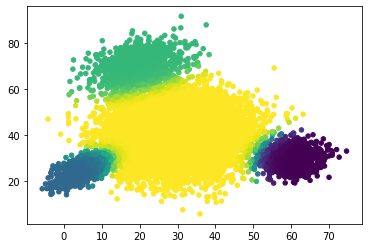

[ 761.03239903  747.62391034 1005.60275934 9985.74093129]
[[60.18888335 30.19707607]
 [ 5.05794926 24.92588821]
 [20.03438453 69.84721009]
 [29.89607379 40.12519148]]
[[[16.85183426  0.2547388 ]
  [ 0.2547388  16.49432111]]

 [[15.19555672  9.62661086]
  [ 9.62661086 15.47295413]]

 [[35.58332494 11.08419454]
  [11.08419454 33.09463207]]

 [[74.52083678  5.20755533]
  [ 5.20755533 73.87299705]]]
-94439.93889004056


In [22]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    k = 4
    pi, m, S, g, l = expectation_maximization(X, k, 150, verbose=True)
    clss = np.sum(g * np.arange(k).reshape(k, 1), axis=0)
    plt.scatter(X[:, 0], X[:, 1], s=20, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, c=np.arange(k), marker='*')
    plt.show()
    print(X.shape[0] * pi)
    print(m)
    print(S)
    print(l)

## 9. BIC

Write a function `def BIC(X, kmin=1, kmax=None, iterations=1000, tol=1e-5, verbose=False)`: that finds the best number of clusters for a GMM using the Bayesian Information Criterion:

- `X` is a `numpy.ndarray` of `shape (n, d)` containing the data set


- `kmin` is a positive integer containing the minimum number of clusters to check for (inclusive)


- `kmax` is a positive integer containing the maximum number of clusters to check for (inclusive)
    - If `kmax` is `None`, `kmax` should be set to the maximum number of clusters possible


- `iterations` is a positive integer containing the maximum number of iterations for the EM algorithm


- `tol` is a non-negative float containing the tolerance for the EM algorithm


- `verbose` is a boolean that determines if the EM algorithm should print information to the standard output


- Returns: `best_k, best_result, l, b`, or `None, None, None, None` on failure
    - `best_k` is the best value for `k` based on its BIC
    - `best_result` is tuple containing `pi, m, S`
        - `pi` is a `numpy.ndarray` of shape `(k,)` containing the cluster priors for the best number of clusters
        - `m` is a `numpy.ndarray` of shape `(k, d)` containing the centroid means for the best number of clusters
        - `S` is a `numpy.ndarray` of shape `(k, d, d)` containing the covariance matrices for the best number of clusters


- `l` is a `numpy.ndarray` of shape `(kmax - kmin + 1)` containing the log likelihood for each cluster size tested


- `b` is a numpy.ndarray of shape `(kmax - kmin + 1)` containing the BIC value for each cluster size tested


- Use: `BIC = p * ln(n) - 2 * l`
    - `p` is the number of parameters required for the model
    - `n` is the number of data points used to create the model
    - `l` is the log likelihood of the model

In [23]:
#!/usr/bin/env python3
""" Bayesian Information Criterion """

import numpy as np

def BIC(X, kmin=1, kmax=None, iterations=1000, tol=1e-5, verbose=False):
    """
    BIC function
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None, None, None
    if type(kmin) != int or kmin <= 0 or kmin >= X.shape[0]:
        return None, None, None, None
    if type(kmax) != int or kmax <= 0 or kmax >= X.shape[0]:
        return None, None, None, None
    if kmin >= kmax:
        return None, None, None, None
    if type(iterations) != int or iterations <= 0:
        return None, None, None, None
    if type(tol) != float or tol <= 0:
        return None, None, None, None
    if type(verbose) != bool:
        return None, None, None, None

    k_best = []
    best_res = []
    logl_val = []
    bic_val = []
    n, d = X.shape
    for k in range(kmin, kmax + 1):
        pi, m, S,  _, log_l = expectation_maximization(X, k, iterations, tol,
                                                       verbose)
        k_best.append(k)
        best_res.append((pi, m, S))
        logl_val.append(log_l)

        # Formula pf paramaters: https://bit.ly/33Cw8lH
        # code based on gaussian mixture source code n_parameters source code
        cov_params = k * d * (d + 1) / 2.
        mean_params = k * d
        p = int(cov_params + mean_params + k - 1)

        # Formula for this task BIC = p * ln(n) - 2 * l
        bic = p * np.log(n) - 2 * log_l
        bic_val.append(bic)

    bic_val = np.array(bic_val)
    logl_val = np.array(logl_val)
    best_val = np.argmin(bic_val)

    k_best = k_best[best_val]
    best_res = best_res[best_val]

    return k_best, best_res, logl_val, bic_val

4
(array([0.79885962, 0.08044842, 0.06088258, 0.05980938]), array([[29.89606417, 40.12518027],
       [20.0343883 , 69.84718588],
       [60.18888407, 30.19707372],
       [ 5.05788987, 24.92583792]]), array([[[74.52101284,  5.20770764],
        [ 5.20770764, 73.8729309 ]],

       [[35.58334497, 11.08416742],
        [11.08416742, 33.09483747]],

       [[16.85183256,  0.25475122],
        [ 0.25475122, 16.4943092 ]],

       [[15.19520213,  9.62633552],
        [ 9.62633552, 15.47268905]]]))
[-98801.40298366 -96729.95558846 -95798.40406023 -94439.93888882
 -94435.87750008 -94428.62217176 -94426.71159745 -94425.5860871
 -94421.41864281 -94416.43390835]
[197649.97338694 193563.67950008 191757.17734716 189096.84790787
 189145.32603394 189187.41628084 189240.19603576 189294.54591859
 189342.81193356 189389.44336818]


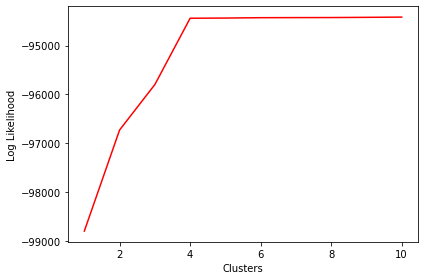

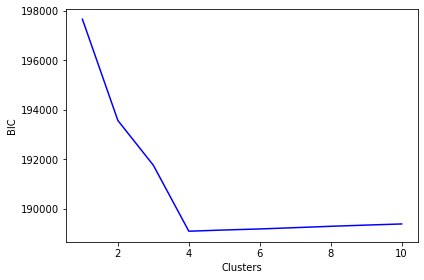

In [24]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)
    best_k, best_result, l, b = BIC(X, kmin=1, kmax=10)
    print(best_k)
    print(best_result)
    print(l)
    print(b)
    x = np.arange(1, 11)
    plt.plot(x, l, 'r')
    plt.xlabel('Clusters')
    plt.ylabel('Log Likelihood')
    plt.tight_layout()
    plt.show()
    plt.plot(x, b, 'b')
    plt.xlabel('Clusters')
    plt.ylabel('BIC')
    plt.tight_layout()
    plt.show()

## 10. Hello, sklearn!

Write a function `def kmeans(X, k)`: that performs K-means on a dataset:

- `X` is a `numpy.ndarray` of shape `(n, d)` containing the dataset


- `k` is the number of clusters


- The only import you are allowed to use is import `sklearn.cluster`


- Returns: `C, clss`
    - `C` is a `numpy.ndarray` of shape `(k, d)` containing the centroid means for each cluster
    - `clss` is a `numpy.ndarray` of shape `(n,)` containing the index of the cluster in C that each data point belongs to

In [25]:
#!/usr/bin/env python3
"""K-means using scikit learn"""

import sklearn.cluster


def kmeans(X, k):
    """
    performs K-means on a dataset
    """
    k_mean = sklearn.cluster.KMeans(n_clusters=k)
    k_mean.fit(X)
    clss = k_mean.labels_
    C = k_mean.cluster_centers_

    return C, clss

[[30.06722465 40.41123947]
 [20.0835633  69.81592298]
 [39.62770705 19.89843487]
 [ 9.92511389 25.73098987]
 [59.22766628 29.19796006]]


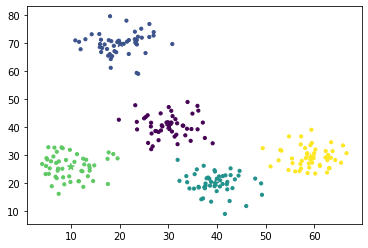

In [26]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    C, clss = kmeans(X, 5)
    print(C)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()


## 11. GMM

Key elements of GMMs include


- **Weights ($\phi$)**: The variable $\phi$ represents the weights of each Gaussian component in the GMM. These weights indicate the probability of each component being chosen.
    - Suppose we have a dataset of customer purchases. In a GMM for customer segmentation, $\phi$ would indicate the proportion of customers in different segments. For example, $\phi$ might be `[0.6, 0.3, 0.1]`, indicating that `60\%` of customers are in Segment 1, `30\%` in Segment 2, and `10\%` in Segment 3.



- **Means (m)**: The variable `m` represents the mean values of each Gaussian component. These means define the center points of the individual clusters.
    - Continuing with customer segmentation, the m values represent the centroids of each segment. 


- **Covariances (S)**: The variable `S` represents the covariance matrices for each Gaussian component. Covariance describes how the features within each cluster vary together. Different covariances allow GMM to capture clusters with varying shapes.
    - Example: For Segment 1, `S` could show that older customers tend to spend more. For Segment `2`, it might indicate that age and spending are less correlated



- **Predictions (clss)**: The clss variable stores the cluster predictions for each data point based on the GMM model. Each data point is assigned to the cluster with the highest probability.
    - Example:  After fitting a GMM to the data, clss assigns each customer to one of the segments based on their purchase behavior.
    
    

- **Bayesian Information Criterion (BIC)**: The variable bic calculates the Bayesian Information Criterion. It is a measure of model quality that balances the likelihood of the data and the complexity of the model. Lower BIC values indicate better model fits.
    - The BIC is a measure of model quality. Let's say we fit GMMs with different numbers of components (e.g., 2, 3, and 4 components) to our customer data. The BIC helps us choose the optimal number of segments. Lower BIC values suggest a better fit, guiding us to select the model that best captures the underlying patterns in the data.


### Our Task

Write a function `def gmm(X, k)`: that calculates a GMM from a dataset:

- `X` is a `numpy.ndarray` of shape `(n, d)` containing the dataset

- `k` is the number of clusters


- The only import you are allowed to use is `import sklearn.mixture`


- Returns: `pi, m, S, clss, bic`
    - `pi` is a `numpy.ndarray` of shape `(k,)` containing the cluster priors
    - `m` is a `numpy.ndarray` of shape `(k, d)` containing the centroid means
    - `S` is a `numpy.ndarray` of shape `(k, d, d)` containing the covariance matrices
    - `clss` is a `numpy.ndarray` of shape `(n,)` containing the cluster indices for each data point
    - `bic` is a `numpy.ndarray` of shape `(kmax - kmin + 1)` containing the BIC value for each cluster size tested

In [27]:
#!/usr/bin/env python3
""" GMM using scikit learn """

import sklearn.mixture


def gmm(X, k):
    """
    calculates a GMM from a dataset
    """
    
    g = sklearn.mixture.GaussianMixture(n_components=k)
    g.fit(X)
    
    pi = g.weights_
    m = g.means_
    S = g.covariances_
    clss = g.predict(X)
    bic = g.bic(X)
    
    return pi, m, S, clss, bic

[0.06076528 0.68866245 0.1720333  0.07853898]
[[60.21013227 30.23755701]
 [30.59423371 40.74616259]
 [18.38259484 32.58443509]
 [20.00603516 70.02132459]]
[[[ 1.66832836e+01  2.71681683e-02]
  [ 2.71681683e-02  1.66374317e+01]]

 [[ 7.00362840e+01 -3.25942844e+00]
  [-3.25942844e+00  7.79993943e+01]]

 [[ 1.52442851e+02  8.07246145e+01]
  [ 8.07246145e+01  6.42697318e+01]]

 [[ 3.54992194e+01  1.13134592e+01]
  [ 1.13134592e+01  3.21422638e+01]]]
189777.98746919443


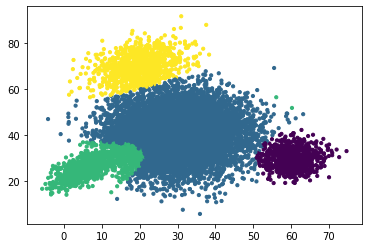

In [28]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    np.random.seed(11)
    a = np.random.multivariate_normal([30, 40], [[75, 5], [5, 75]], size=10000)
    b = np.random.multivariate_normal([5, 25], [[16, 10], [10, 16]], size=750)
    c = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=750)
    d = np.random.multivariate_normal([20, 70], [[35, 10], [10, 35]], size=1000)
    X = np.concatenate((a, b, c, d), axis=0)
    np.random.shuffle(X)

    pi, m, S, clss, bic = gmm(X, 4)
    print(pi)
    print(m)
    print(S)
    print(bic)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(m[:, 0], m[:, 1], s=50, marker='*', c=list(range(4)))
    plt.show()

## 12. Agglomerative

The key idea of **agglomerative clustering**, a hierarchical clustering technique, is to **start with each data point as its own cluster and iteratively merge (agglomerate) the closest clusters together until all data points belong to a single cluster** or until a predefined stopping criterion is met. Here are the main points that illustrate the concept of agglomerative clustering:


- **Initialization**: Begin with each data point as a separate cluster. So, if you have `N` data points, you start with `N` clusters, each containing just one data point.


- **Pairwise Distances**: Calculate the pairwise distances (similarity or dissimilarity measures) between all clusters. This could be based on various metrics like Euclidean distance, Manhattan distance, or correlation, depending on the nature of the data.


- **Merge Closest Clusters**: Identify the two closest clusters based on the calculated distances and merge them into a single cluster. This reduces the total number of clusters by one.



- **Repeat**: Recalculate distances between the newly formed cluster and all other clusters. Then, again, merge the closest pair of clusters.



- **Stopping Criterion**: Continue this process until a stopping criterion is met. The stopping criterion could be a predetermined number of clusters you want, a distance threshold below which you won't merge clusters, or other criteria based on the characteristics of your data.



- **Hierarchy**: Throughout this process, you create a hierarchy or dendrogram that visually represents the merging sequence of clusters. This hierarchy can be cut at different levels to obtain different numbers of clusters, allowing you to explore the data's natural grouping structure at various resolutions.



Agglomerative clustering is an intuitive approach that doesn't require specifying the number of clusters beforehand, making it useful for exploring the inherent structure of data. It's often visualized using dendrograms, and the choice of linkage criteria (how to measure the distance between clusters) can impact the results and the interpretation of the clusters.


### Side Note: SciPy


SciPy is an open-source Python library that builds on the capabilities of NumPy and provides additional tools for scientific and technical computing. It offers a wide range of modules and functions for tasks such as optimization, integration, interpolation, linear algebra, statistics, signal processing, and more


- **Linkage**: In hierarchical clustering, "linkage" refers to the method used to compute the distance between clusters. Different linkage methods determine how the distance between clusters is measured, and they include single linkage (minimum pairwise distance), complete linkage (maximum pairwise distance), average linkage (average pairwise distance), and more. The choice of linkage method can significantly impact the resulting hierarchy of clusters.


- **fcluster**: The fcluster function is a part of the SciPy library used for hierarchical clustering. It assigns data points to specific clusters based on the results of hierarchical clustering. You provide a threshold or the number of clusters you want to obtain, and fcluster assigns each data point to its corresponding cluster based on the hierarchical structure.



- **Dendrogram**: A dendrogram is a tree-like diagram that visualizes the hierarchy of clusters created during hierarchical clustering. It represents the merging of clusters at different levels of proximity, with the leaves of the tree representing individual data points or small clusters and the root of the tree representing a single large cluster that encompasses all data points. Dendrograms provide insight into how data points are grouped into clusters at various levels of similarity or distance.







### Our Task


Write a function `def agglomerative(X, dist)`: that performs agglomerative clustering on a dataset:

- `X` is a `numpy.ndarray of shape (n, d)` containing the dataset


- `dist` is the maximum cophenetic distance for all clusters


- Performs agglomerative clustering with Ward linkage


- Displays the dendrogram with each cluster displayed in a different color


- Returns: `clss`, a `numpy.ndarray of shape (n,)` containing the cluster indices for each data point

In [29]:
#!/usr/bin/env python3
""" Agglomerative clustering using scikit """

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


def agglomerative(X, dist):
    """
    Agglomerative clustering
    """
    linkage = sch.linkage(X, method='ward')
    clss = sch.fcluster(linkage, t=dist, criterion='distance')
    plt.figure()
    sch.dendrogram(linkage, color_threshold=dist)
    plt.show()
    return clss

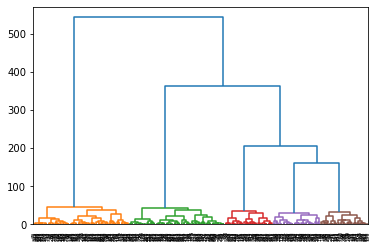

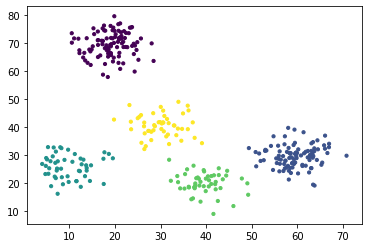

In [30]:
#!/usr/bin/env python3
import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=100)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=100)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    clss = agglomerative(X, 100)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.show()

## Further Example: Hierarchical Clustering on Iris Dataset

In the example below, we perform hierarchical clustering on the Iris dataset using the Ward linkage method and visualize the clustering results using a dendrogram. 

Hierarchical clustering groups similar data points into clusters hierarchically, creating a tree-like structure (dendrogram) that illustrates the relationships between data points and clusters. 


In this specific code, the Iris dataset is loaded, and hierarchical clustering is applied to the data using the Ward linkage method, which aims to minimize the variance when merging clusters. 


The resulting dendrogram visualizes how the data points are grouped together based on their similarity, allowing for the identification of clusters and insights into the dataset's structure. 


The dendrogram's x-axis represents individual samples, and the y-axis represents the distance or dissimilarity between clusters or data points. By analyzing the dendrogram, one can make decisions about the number of clusters and their composition.

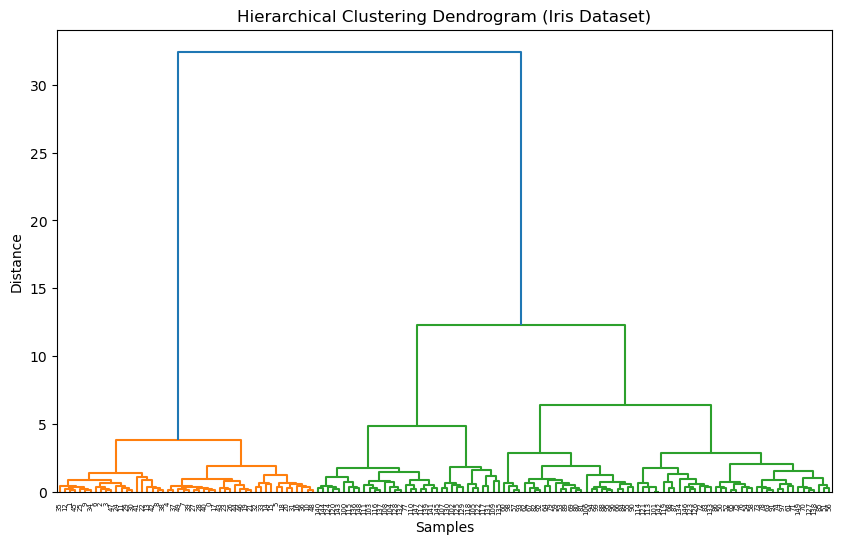

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data

# Perform hierarchical clustering using Ward linkage
linkage_matrix = hierarchy.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dn = hierarchy.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


## Happy Coding